# ATT&CK® Data Sources, Components, and Relationships!!
---------------------------------
* **Author**: Jose Luis Rodriguez - [@Cyb3rPandaH](https://twitter.com/Cyb3rPandaH)
* **Organization**: [MITRE ATT&CK](https://attack.mitre.org/)
* **Blog Reference**: 
  - [Defining ATT&CK Data Sources, Part I: Enhancing the Current State](https://medium.com/mitre-attack/defining-attack-data-sources-part-i-4c39e581454f)
  - [Defining ATT&CK Data Sources, Part II: Operationalizing the Methodology](https://medium.com/mitre-attack/defining-attack-data-sources-part-ii-1fc98738ba5b)
  - [Data Sources, Containers, Cloud, and More: What’s New in ATT&CK v9?](https://medium.com/mitre-attack/attack-april-2021-release-39accaf23c81)

## Goal & Scope

The present notebook is intended to provide basic examples on how can you get insights from current **data sources metadata** from **ATT&CK v9**. The examples provided consider (sub)techniques for the **enterprise matrix**.

## Requirements - notebook_functions.py

In this notebook we are using [Python](https://www.python.org) libraries such as [attackcti](https://pypi.org/project/attackcti/), [pandas](https://pandas.pydata.org/), and [yaml](https://pyyaml.org/wiki/PyYAML). The functions we are using in this notebook are defined within the **notebook_funtion.py** [program](https://github.com/Cyb3rPandaH/attack-datasources/tree/main/docs/scripts/notebook_functions.py/) in order to show less lines of code and focus in the exploration of data source objects. You will find more details and comments within the python program. Use the following commands to run the program, import the required libraries, and define functions:

In [19]:
%run docs\\scripts\\notebook_functions.py

## What is the current state of Data Sources within ATT&CK®?

### Data Components mapped to Enterprise Techniques

Currently, v9 of the ATT&CK framework contains only **Data Components** as metadata for data sources. Let's get all data sources and data components mapped to ATT&CK Enterprise Techniques.

In [4]:
attack = get_attack_dataframe()
attack.head()

,technique_id,x_mitre_is_subtechnique,technique,tactic,platform,data_source,data_component
0,T1553.006,True,Code Signing Policy Modification,[defense-evasion],"[Windows, macOS]",Windows Registry,Windows Registry Key Modification
1,T1553.006,True,Code Signing Policy Modification,[defense-evasion],"[Windows, macOS]",Command,Command Execution
2,T1553.006,True,Code Signing Policy Modification,[defense-evasion],"[Windows, macOS]",Process,Process Creation
3,T1614,False,System Location Discovery,[discovery],"[Windows, Linux, macOS, IaaS]",Instance,Instance Metadata
4,T1614,False,System Location Discovery,[discovery],"[Windows, Linux, macOS, IaaS]",Process,Process Creation


### Most Relevant Data Components Within Enterprise Sub-Techniques (ALL)

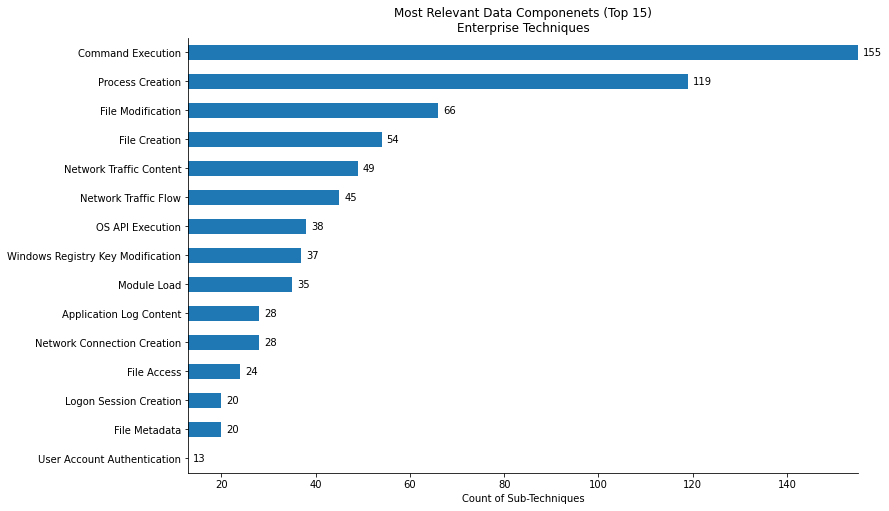

In [7]:
st = attack[attack['x_mitre_is_subtechnique'] == True]
t15_dc = st['data_component'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Componenets (Top 15)\nEnterprise Techniques'
barh_chart(t15_dc,'data_component','index',title, xlabel = 'Count of Sub-Techniques')

### Most Relevant Data Components Within Enterprise Sub-Techniques (By Platform)

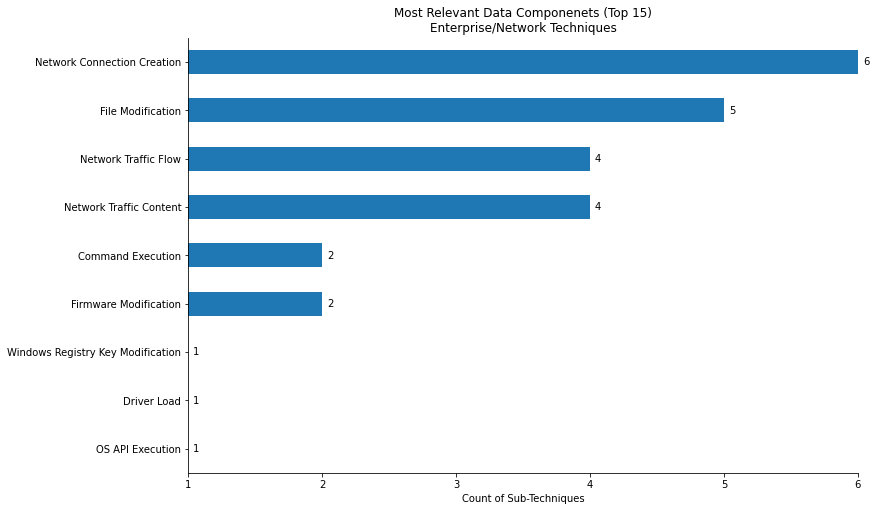

In [9]:
platform = 'Network' # Change this value to update the chart
st_p = attack[attack['x_mitre_is_subtechnique'] == True]
st_p = st_p[(st_p['platform'].apply(lambda x: ' '.join([str(i) for i in x])).str.contains(platform))]
t15_dc_p = st_p['data_component'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Componenets (Top 15)\n'+'Enterprise/'+ platform+ ' Techniques'
barh_chart(t15_dc_p,'data_component','index',title, xlabel = 'Count of Sub-Techniques')

### Most Relevant Data Components Within Enterprise Sub-Techniques (By Tactic)

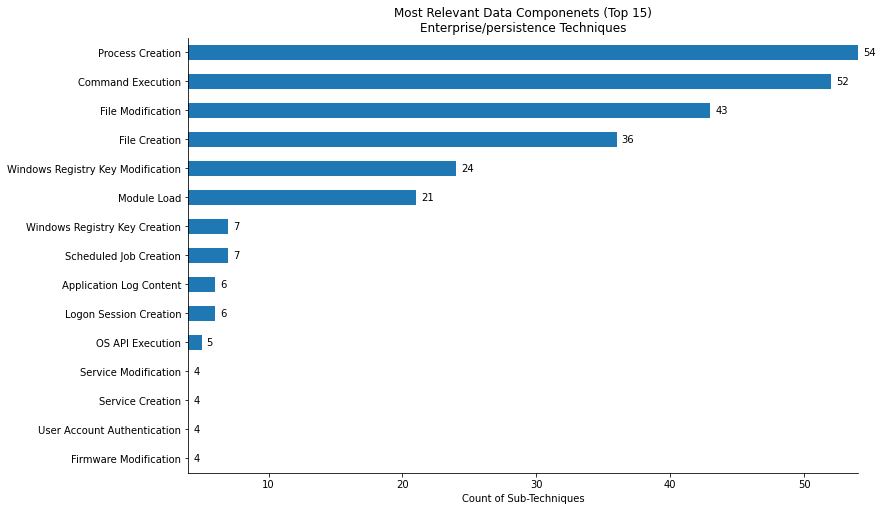

In [11]:
tactic = 'persistence' # Change this value to update the chart
st_t = attack[attack['x_mitre_is_subtechnique'] == True]
st_t = st_t[(st_t['tactic'].apply(lambda x: ' '.join([str(i) for i in x])).str.contains(tactic))]
t15_dc_t = st_t['data_component'].value_counts().nlargest(15).to_frame().reset_index()
title = 'Most Relevant Data Componenets (Top 15)\n'+'Enterprise/'+ tactic+ ' Techniques'
barh_chart(t15_dc_t,'data_component','index',title, xlabel = 'Count of Sub-Techniques')

## How do Sub-Techniques, Data Sources, and Data Components relate to each other?

### Use case: T1134 Access Token Manipulation

Even though tables and bar chart are really helpful when summarizing data, other type of visualization such as a **Network** graph could also help us to get a better understanding of how relevant a data component can be when analyzing ATT&CK techniques.

#### Recommended data sources for sub-techniques under Access Token Manipulation for Defense Evasion (Tactic) in Windows (Platform)

In [5]:
mapping = attack[attack['x_mitre_is_subtechnique'] == True]
mapping = mapping[mapping['technique_id'].str.contains('T1134')]
mapping = mapping[mapping['tactic'].apply(lambda x: ' '.join([str(i) for i in x])).str.contains('defense-evasion')]
mapping = mapping[mapping['platform'].apply(lambda x: ' '.join([str(i) for i in x])).str.contains('Windows')]
mapping

,technique_id,x_mitre_is_subtechnique,technique,tactic,platform,data_source,data_component
641,T1134.005,True,SID-History Injection,"[defense-evasion, privilege-escalation]",[Windows],Process,OS API Execution
642,T1134.005,True,SID-History Injection,"[defense-evasion, privilege-escalation]",[Windows],User Account,User Account Metadata
643,T1134.005,True,SID-History Injection,"[defense-evasion, privilege-escalation]",[Windows],Active Directory,Active Directory Object Modification
644,T1134.004,True,Parent PID Spoofing,"[defense-evasion, privilege-escalation]",[Windows],Process,OS API Execution
645,T1134.004,True,Parent PID Spoofing,"[defense-evasion, privilege-escalation]",[Windows],Process,Process Creation
646,T1134.004,True,Parent PID Spoofing,"[defense-evasion, privilege-escalation]",[Windows],Process,Process Metadata
647,T1134.003,True,Make and Impersonate Token,"[defense-evasion, privilege-escalation]",[Windows],Process,OS API Execution
648,T1134.003,True,Make and Impersonate Token,"[defense-evasion, privilege-escalation]",[Windows],Command,Command Execution
649,T1134.002,True,Create Process with Token,"[defense-evasion, privilege-escalation]",[Windows],Process,OS API Execution
650,T1134.002,True,Create Process with Token,"[defense-evasion, privilege-escalation]",[Windows],Command,Command Execution


#### Network Graph

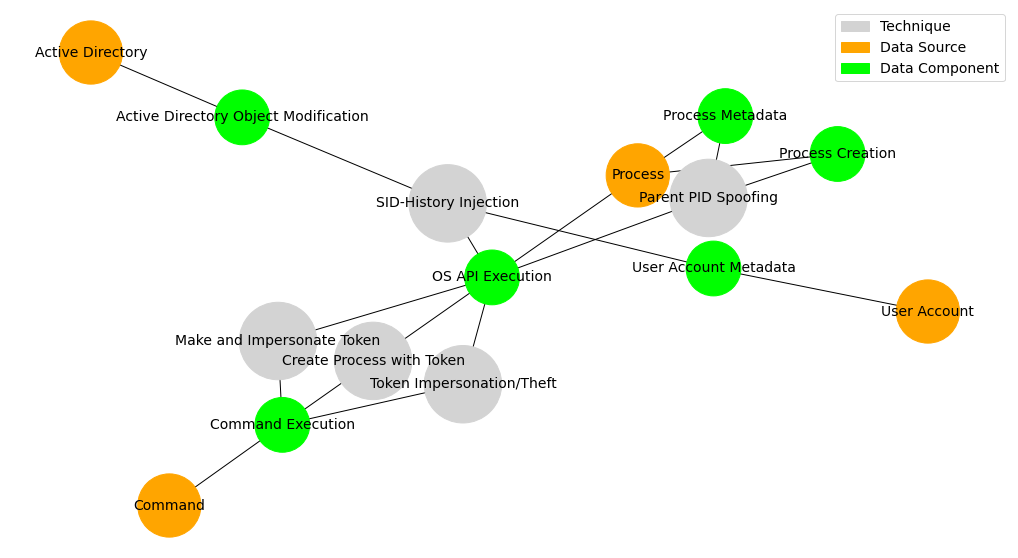

In [40]:
attack_network_graph(mapping)

## How can I import the ATT&CK Techniques to Relationships mapping YAML file? 

In [19]:
techniques_to_relationships = import_yaml('docs/techniques_to_relationships_mapping.yaml')
techniques_to_relationships.head()

,technique_id,x_mitre_is_subtechnique,tactic,platform,data_source,definition,collection_layers,data_source_platform,contributors,data_component,type,description,source_data_element,relationship,target_data_element,references
0,T1553.006,True,[defense-evasion],"[Windows, macOS]",windows registry,Information about configuration data used by applications and system components.,[host],[Windows],[ATT&CK],windows registry key modification,activity,A registry key was modified.,process,modified,windows registry key,[https://docs.microsoft.com/en-us/windows/win32/sysinfo/registry]
1,T1553.006,True,[defense-evasion],"[Windows, macOS]",windows registry,Information about configuration data used by applications and system components.,[host],[Windows],[ATT&CK],windows registry key modification,activity,A registry key was modified.,process,modified,windows registry key value,[https://docs.microsoft.com/en-us/windows/win32/sysinfo/registry]
2,T1553.006,True,[defense-evasion],"[Windows, macOS]",windows registry,Information about configuration data used by applications and system components.,[host],[Windows],[ATT&CK],windows registry key modification,activity,A registry key was modified.,user,modified,windows registry key,[https://docs.microsoft.com/en-us/windows/win32/sysinfo/registry]
3,T1553.006,True,[defense-evasion],"[Windows, macOS]",windows registry,Information about configuration data used by applications and system components.,[host],[Windows],[ATT&CK],windows registry key modification,activity,A registry key was modified.,user,modified,windows registry key value,[https://docs.microsoft.com/en-us/windows/win32/sysinfo/registry]
4,T1553.006,True,[defense-evasion],"[Windows, macOS]",command,Information about commands that can be used through a command-line interface and/or script interpreter.,"[host, container]","[Windows, Linux, macOS, Network, Containers]","[Austin Clark, ATT&CK, CTID]",command execution,activity,Information about commands executed through a command-line interface and/or script interpreter.,user,executed,command,"[https://tools.ietf.org/id/draft-ietf-opsawg-tacacs-07.html#rfc.section.7.2, https://tools.ietf.org/html/rfc2866]"


# We hope you find this notebook helpful!! Thank you :)